# Tutorial Basics Noten Part 2: Statistik

Inhaltsverzeichnis: 
1. Abfrage von einfachen statistischen Angaben
2. Häufigkeiten: Tonhöhen, Tonhöhenklassen, Tondauern, metrische Akzente, Intervalle
3. Zweidimensionale Häufigkeitsverteilungen
4. Aufgaben

In diesem Tutorial werden Sie anhand von Notenbeispielen einfache computergestützten Möglichkeiten statistischer Abfragen auf der Grundlage von CAMAT kennenlernen. 

Das Durcharbeiten und Nachvollziehen des Tutoriums soll es Ihnen ermöglichen, mit den vorgestellten computergestützten Methoden eigene Musikbeispiele (Notendateien) zu untersuchen und Vergleiche zwischen verschiedenen Musikstücken durchzuführen. 
Dabei geht es immer auch um die Formulierung bestimmter analytischer Fragestellungen und die Interpretation der jeweiligen Ergebnisse.

Jeder Start eines Jupyter Notebooks beginnt mit dem Import einer Reihe von Python-Bibliotheken, die für die Analyse erforderlich sind:  

In [1]:
import sys
import os
sys.path.append(os.getcwd().replace(os.path.join('music_xml_parser', 'ipynb'), ''))

import music_xml_parser as mp
from music21 import * 
import csv
from IPython.display import HTML, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mit diesen Befehlen wird nicht nur der CAMAT music_xml_parser, 
# sondern darüber hinaus die Bibliotheken 'numpy' und 'pandas' für statische Auswertungen, 
# 'music21' sowieund 'matplotlib' für grafische Darstellungen geladen. 

# Mit den folgenden Befehlen wird die Formtierung für die Tabellen festgelegt, 
# die weiter unten dargestellt werden: 

pd.set_option('display.max_rows', 9999)
pd.set_option('display.max_columns', 9999)
pd.set_option('display.width', 9999)

environment.set('autoDownload', 'allow')
# Hierdurch wird der Download von xml-Dateien aus dem Internet ermöglicht. 

Anschließend müssen Sie die Datei laden, die Sie untersuchen wollen (aus dem Internet oder von Ihrer Festplatte bzw. aus dem Notenordner) und den xml-parser aktivieren. Dabei wird aus der xml-Datei ein neuer dataframe ('m_df') erzeugt, der den folgenden statistischen Abfragen zugrunde liegt. 

Wir wählen für unser Tutorial als Beispiel den ersten Satz aus dem Streichquartett KV. 171 von Wolfgang Amadeus Mozart. 

In [2]:
xml_file = 'https://analyse.hfm-weimar.de/database/03/MoWo_K171_COM_1-4_StringQuar_003_00867.xml'

m_df = mp.parse.with_xml_file(file=xml_file,
                                    save_at=None,
                                    save_file_name=None,
                                    do_save=False, 
                                    x_axis_res=2)

# 'm_df' wird als Variable für den Pandas-Dataframe definiert. 
# Dabei können verschiedene arameter festgelegt werden (in der Regel mit True/False oder True/None)

# save_at - Pandas Dataframe in einem bestimmten Ordner als CSV Speichern
# save_file_name - Pandas Dataframe unter einem bestimmten Namen als CSV Speichern
# do_save - Speichern mit True/False
# x_axis_res - Pianoroll: Auflösung der X-Achse als Teiler der Viertelnote (2=0.5 Viertelnote)


### 1. Abfrage von einfachen statistischen Angaben

Wir beginnen mit einfachen statistischen Abfragen: Anzahl der Stimmen, Anzahl der Töne (insgesamt und pro Stimmen), Länge in Takten, Ambitus:

In [3]:
v = m_df[['PartID','PartName']].drop_duplicates().to_numpy()
mp.utils.display_table(data=v, 
                       columns=['Part ID', 'Part Names'])

# in der ersten Zeile wird aus der dataframe-Liste des xml-Parser ('m_df')
# die PartIDs und PartNames, 
# also die IDs und Bezeichnungen der einzelnen Stimmen, abgefragt. 
# Hierfür wird die Variable 'v' vergeben.
# In der zweiten Zeile wird die Darstellung der Tabelle festgelegt. 

Part ID,Part Names
1,Violino I
2,Violino II
3,Viola
4,Violoncello


In [4]:
m = m_df['Measure'].to_numpy(dtype=int)
max(m)
# Abfrage der Stückänge in Takten

159

In [5]:
n_notes, c_notes = np.unique(m_df['PartName'], return_counts=True)
data = [[i, c] for i, c in zip(n_notes, c_notes) ]
mp.utils.display_table(data=data, 
                       columns=['PartName', '# Notes'])
 
# Abfrage der Anzahl der Töne per Stimme 
# (wobei übergebundene Noten jeweils als eine Note gezählt werden). 
# Falls die Stimmen in der xml-Datei keine Bezeichnungen besitzen, 
# so muss 'PartName' durch 'Part ID'  ersetzt werden (2x)! 

PartName,# Notes
Viola,382
Violino I,576
Violino II,626
Violoncello,385


In [6]:
ambitus = mp.analyse.ambitus(m_df,output_as_midi=True)
mp.utils.display_table(data=ambitus, 
                       columns=['Part ID', 'Part Name', 'min', 'max', 'Ambitus'])

# Der Ambitus per Stimme errechnet sich aus der Differenz zwischen 
# dem niedrigsten (min) und höchsten (max) Ton, hier angegeben in MIDI-Werten. 

Part ID,Part Name,min,max,Ambitus
1,Violino I,57,87,30
2,Violino II,55,82,27
3,Viola,48,75,27
4,Violoncello,39,67,28


In [7]:
ambitus = mp.analyse.ambitus(m_df,output_as_midi=False)
mp.utils.display_table(data=ambitus, 
                       columns=['Part ID', 'Part Name','min', 'max', 'Semitones Difference'])

# Durch den Zusatz 'output_as_midi=False' werden die Töne mit Tonnamen angegeben. 

Part ID,Part Name,min,max,Semitones Difference
1,Violino I,A3,D#6,30
2,Violino II,G3,A#5,27
3,Viola,C3,D#5,27
4,Violoncello,D#2,G4,28


Aufgabe: Ersetzen Sie in dem Befehl 'Part ID' durch 'Part Name' und drücken Sie im Menu auf Run. Wie verändert sich dadurch die Tabelle?

### 2. Häufigkeiten: Tonhöhen, Tonhöhenklassen, Tondauern

Zur Charakterisierung einzelner Musikstücke und zum Vergleich zwischen verschiedenen Musikstücken kann es sinnvoll sein, die Häufigkeit bestimmter Elemente (Tonhöhen, Dauernwerte, Akkorde etc.) zu bestimmen. Für solche Fragen lassen sich Häufigkeitstabellen und grafische Darstellungen, sog. Histogramme erstellen. 

### 2.1 Tonhöhen

Welche Töne tauchen wie häufig auf? Wie diatonisch ist der Tonraum der Komposition, wie viele zusätzliche chromatische Töne tauchen auf?

MIDI,Pitch,Occurences
39,D#2,7
41,F2,7
43,G2,9
44,G#2,13
45,A2,6
46,A#2,51
47,B2,4
48,C3,22
49,C#3,2
50,D3,25


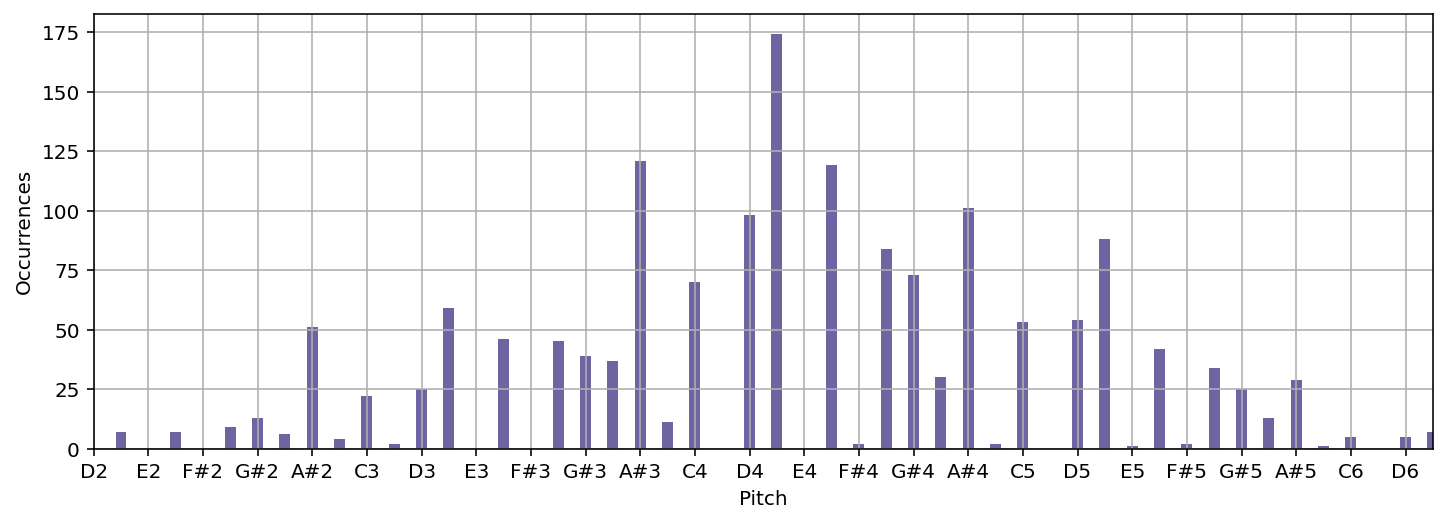

In [8]:

pitch_hist = mp.analyse.pitch_histogram(m_df, do_plot=True, visulize_midi_range=None)
mp.utils.display_table(data=pitch_hist, 
                       columns=['MIDI', 'Pitch','Occurences'])
# Mit der ersten Zeile wird die Abfrage ausgeführt 
# und die Grafik dargestellt ('do_plot=True').
# Mit der zweiten Zeile wird die Tabelle dargestellt und beschriftet. 


Was können wir beobachten?

##### Vertiefungen:

Die Grafik lässt sich auch in einem externen Pop-Up-Fenster des Programms Matplotlib darstellen und dort weiterverarbeiten, vergrößern, umformatieren und speichern etc. Dazu muss dem Code der Befehl '%matplotlib' vorangestellt werden: 

Using matplotlib backend: MacOSX


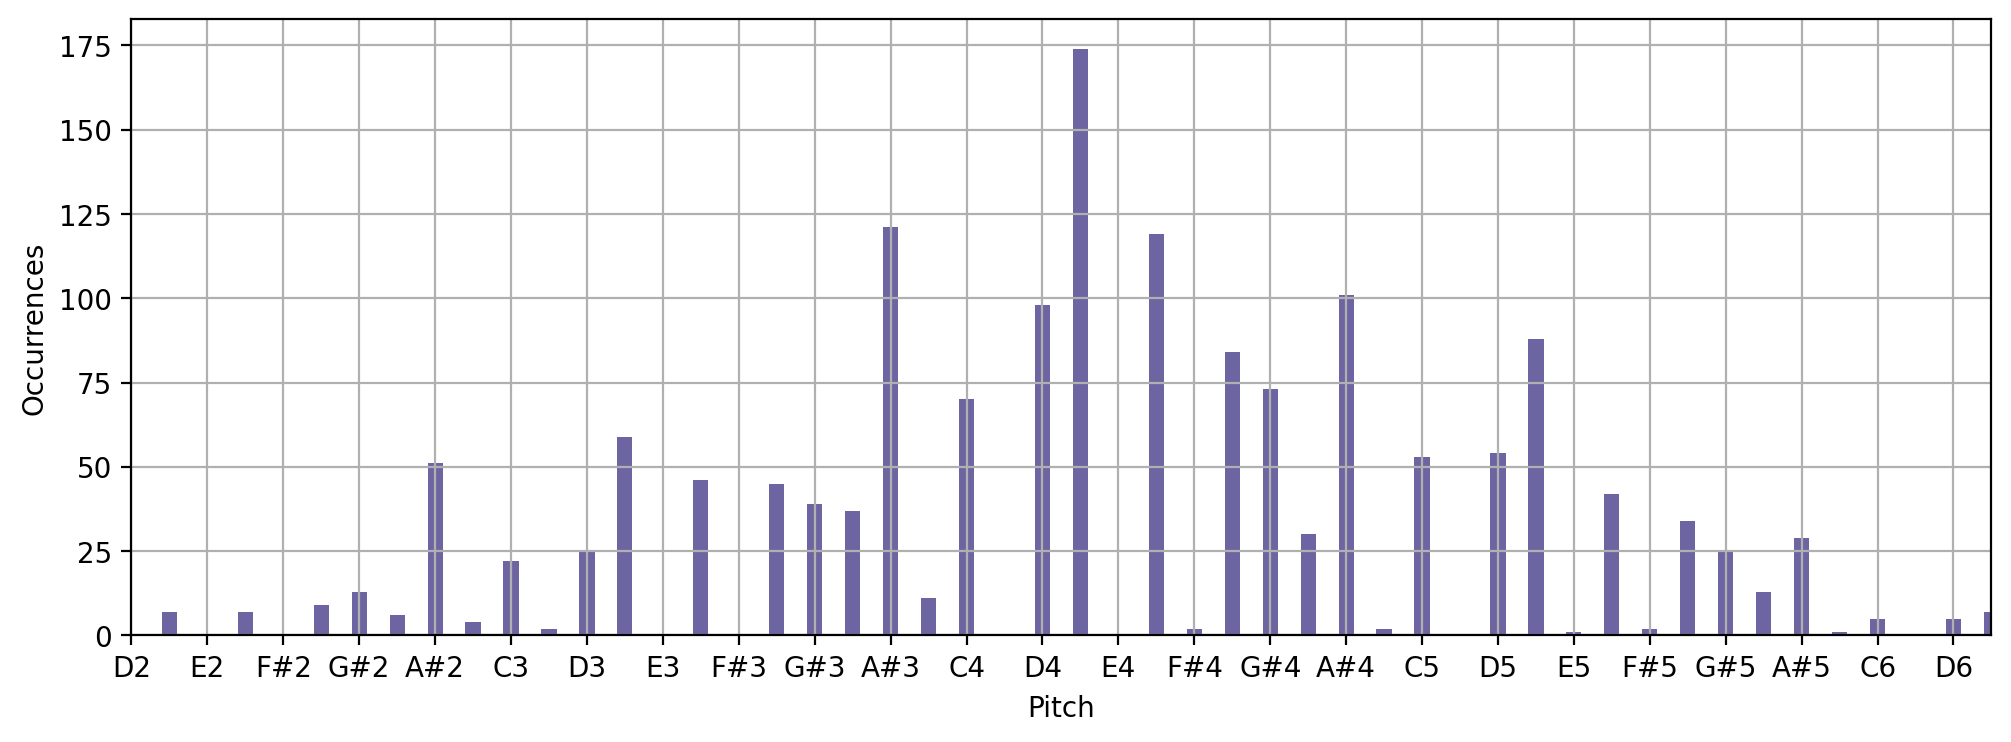

In [9]:
%matplotlib
pitch_hist = mp.analyse.pitch_histogram(m_df, do_plot=True, visulize_midi_range=None)

Anschließend muss Matplotlib durch den Befehl '%matplotlib inline' wieder ausgeschaltet werden. Ansonsten werden alle folgenden Grafiken extern dargestellt. 

In [10]:
%matplotlib inline

Es gibt zwei weitere Möglichkeiten, die Darstellung zu verbessern: 
Einerseits kann die Darstellung auf einen bestimmten Tonhöhenbereich eingeschränkt werden. 
Andererseits können nur jene Tonhöhen ausgewählt werden, die tatsächlich auftreten. 

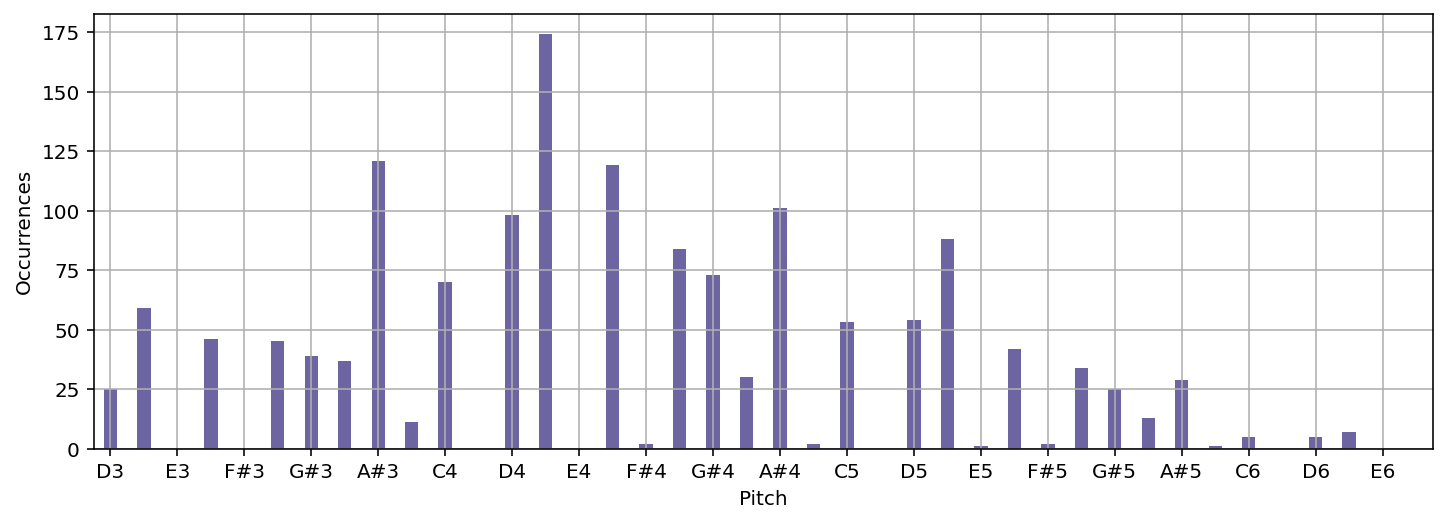

In [11]:
ph = mp.analyse.pitch_histogram(m_df, do_plot=True, visulize_midi_range=[50, 90])

# Durch den Zusatz 'visulize_midi_range=[50, 90]' wurde der dargestellte Ausschnitt
# auf den Bereich zwischen MIDI-Pitch 50 (= D3) und 90 (= F6) eingegrenzt.

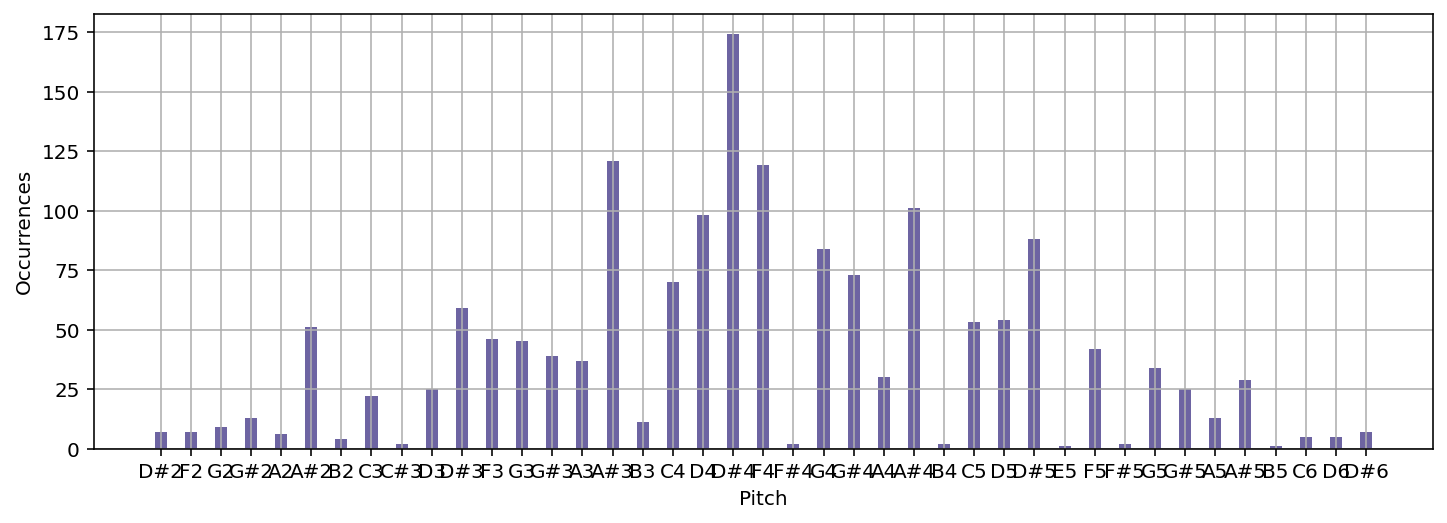

In [12]:

ph2 = mp.analyse.pitch_histogram(m_df, do_plot=True, do_plot_full_axis=False, visulize_midi_range=None)

# Durch den Zusatz 'do_plot_full_axis=False,' werden bei der folgenden Grafik 
# nur die Häufigkeiten von Tönen angezeigt, die auch tatsächlich auftauchen. 
# Alle anderen Töne werden auf der x-Achse gelöscht. 

Durch den folgenden Befehl wird eine Liste der Tonhöhenhäufigkeiten angezeigt und als csv-Datei exportiert (csv = comma separated variables; lesbar und weiterverarbeitbar u.a. in Excel oder im Text-Editor). Durch den Export lassen sich Tabellen zum Stückvergleich und zur Korpusanalyse generieren. Die csv-Datei wird in dem Ordner gespeichert, den Sie in Ihren Settings als "settings['directoryScratch']" festgelegt haben und kann mit einem Texteditor oder einem Tabellenkalkulationsprogramm (z.B. Excel) geöffnet werden. 

In [13]:
mp.utils.export_as_csv(data=pitch_hist, 
                       columns=['MIDI','Pitch','Occurrences'],
                       save_file_name ='pitch_histogram.csv',  # Sie können auch einen anderen Dateinamen festlegen.
                       do_save=True,    # Befehl für die Speicherung
                       do_print=False,  # bei 'True' wird die Datei nochmals im Browser angezeigt.
                       sep=';',         # Als Trennzeichen wird ein Semikolon verwendet.  
                       header=True)

# Die Datei pitch_histogram.csv wird automatisch im Ordner music_xml_parser\data\exports\ gespeichert. 

# "do_save=True" nicht vergessen, dann wird csv im demselben Ordner wie der Jupyter-Notebook gespeichert
# Wenn Sie in einem anderen Ordner abspeichern wollen, so müssen Sie unter 
# save_file_name einen Pfad eingeben (z.B. 'C:/pitch_histogram.csv')

# header=True -> headers der Spalten werden angezeigt. 

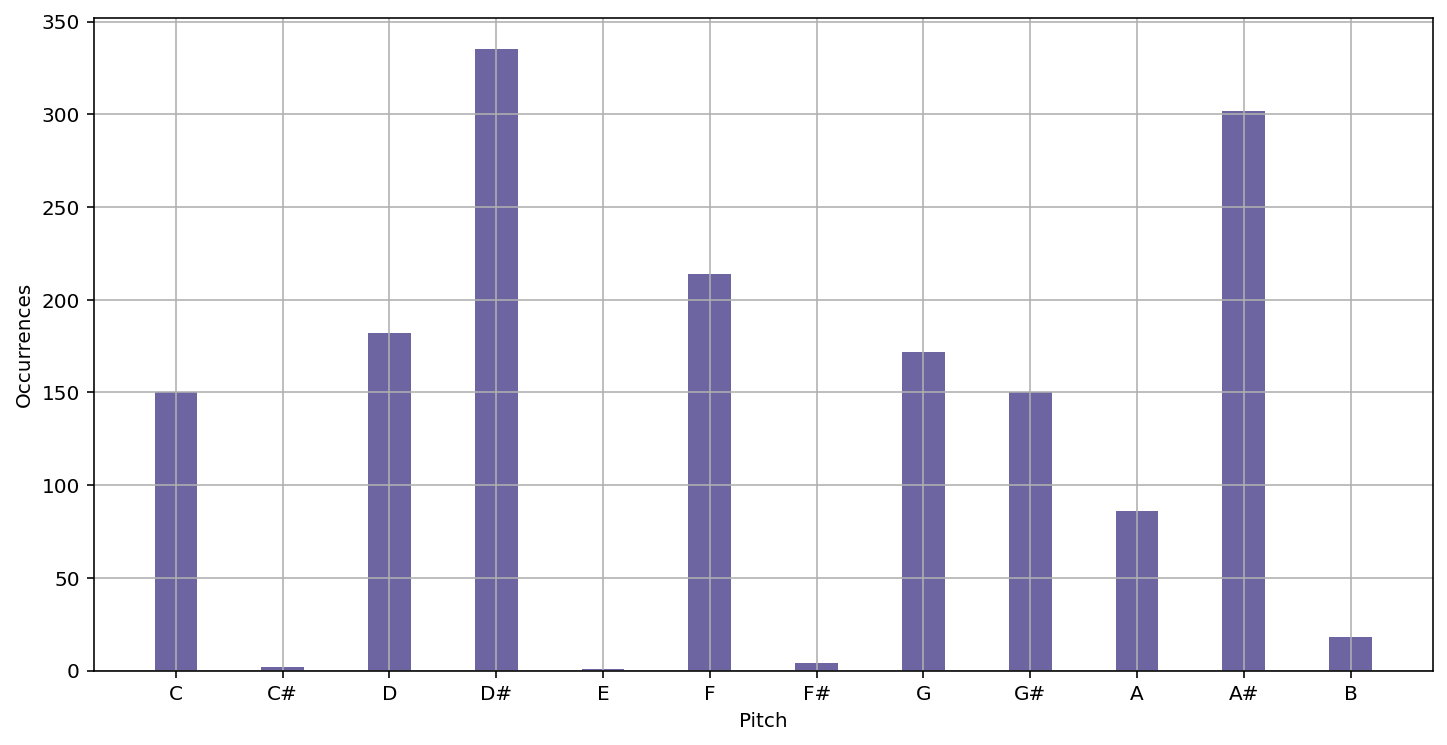

Pitch Class,Occurrences
C,150
C#,2
D,182
D#,335
E,1
F,214
F#,4
G,172
G#,150
A,86


In [14]:
pitchclass_hist = mp.analyse.pitch_class_histogram(m_df, do_plot=True)

# Die Häufigkeiten werden mit dem folgenden Befehl abgespeichert: 

mp.utils.export_as_csv(data=pitchclass_hist, 
                       columns=['Pitch Class','Occurrences'],
                       save_file_name ='pitch_class_hist.csv', 
                       do_save=False,
                       do_print=True, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)


@Martin and @Egor : Not sure exactly why there are two times A note. Please check the unique values extracted from the xml file. What does A0 mean because row nummber 5, A0 Correspondes to 57 midi values which is A3 and not A0

To do: Interpretation?

### 2.3 Tondauern 

Welche Dauernwerte werden in der Komposition verwendet und wie häufig kommen diese jeweils vor?

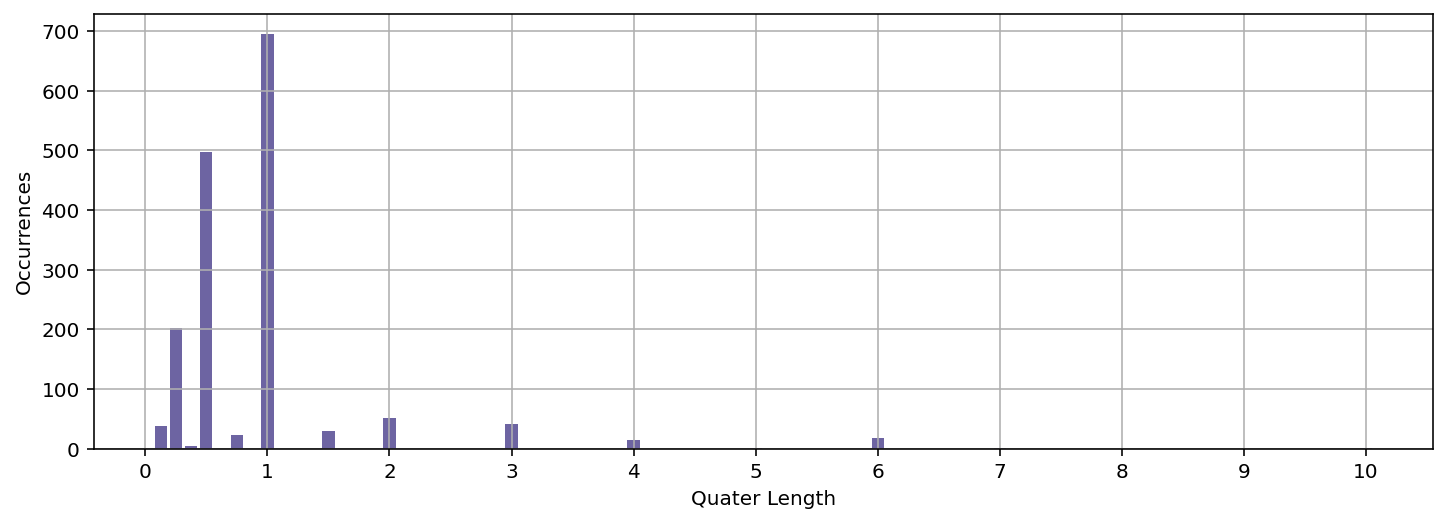

Duration,Occurrences
0.12,38
0.25,202
0.38,4
0.50,497
0.75,22
1.00,694
1.50,30
2.00,51
3.00,42
4.00,15


In [15]:
# Für das Dauernwerte-Histogram muss eine andere Befehlsmethode angewendet werden.
# Der graph-Befehl muss mit dem run-Befehl kombiniert werden. 

quarter_dur_hist = mp.analyse.quarterlength_duration_histogram(m_df,
                                                               do_plot=True)

mp.utils.export_as_csv(data=quarter_dur_hist, 
                       columns=['Duration', 'Occurrences'],
                       save_file_name ='quarter_duration_hist.csv', 
                       do_save=False,         
                       do_print=True, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

Die Notenwerte werden als Vielfache und Bruchteile einer Viertelnote (Quarter Length) gezählt. 

@ Christon: how could the bar chart be adjusted in a way that the bars (for the quarter length subdivisions) don't overlap?

### 2.4 Metrisches Profil 

Wie deutlich wird das Metrum in den einzelnen Stimmen einer Komposition – durch die Platzierung der Töne auf Taktanfängen und den metrisch wichtigen Positionen innerhalb des Taktes (z.B. der Taktmitte oder auf den Viertelpositionen)? Hierzu lässt sich in eine Liste der Häufigkeiten von Tönen auf den verschiedenen metrischen Positionen in den einzelnen Stimmen anzeigen. 
Ein solches Profil hat natürlich zur Voraussetzung, dass das untersuchte Stück in einem einzigen Metrum steht und keine Taktwechsel hat. Das überprüft man mit dem folgenden Befehl: 

In [16]:
ts_hist = mp.analyse.time_signature_histogram(m_df, do_plot=False,do_adjusted=False)
mp.utils.display_table(data=ts_hist, 
                       columns=['Time Signature', 'Occurences'])

Time Signature,Occurences
4/4,31
3/4,128


Es tauchen also sowohl 4/4-Takte als auch 3/4-Takte in dem Stück auf, wobei der 3/4-Takt überwiegt. Mit dem folgenden Befehl werden daher zwei unterschiedliche metrische Profile erzeugt. 

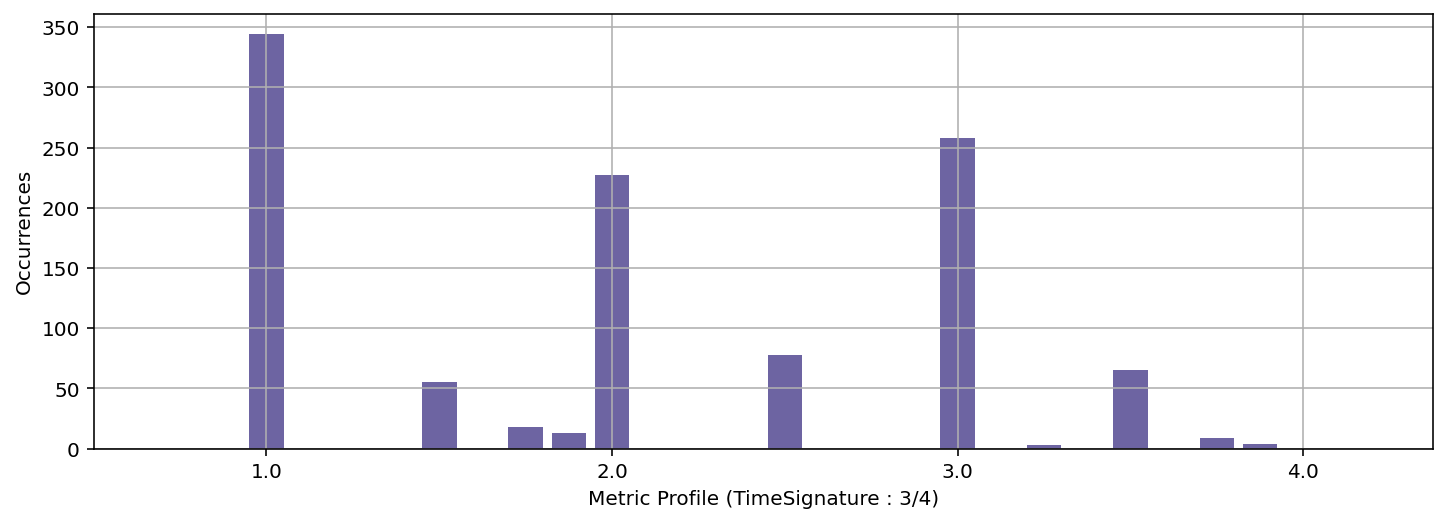

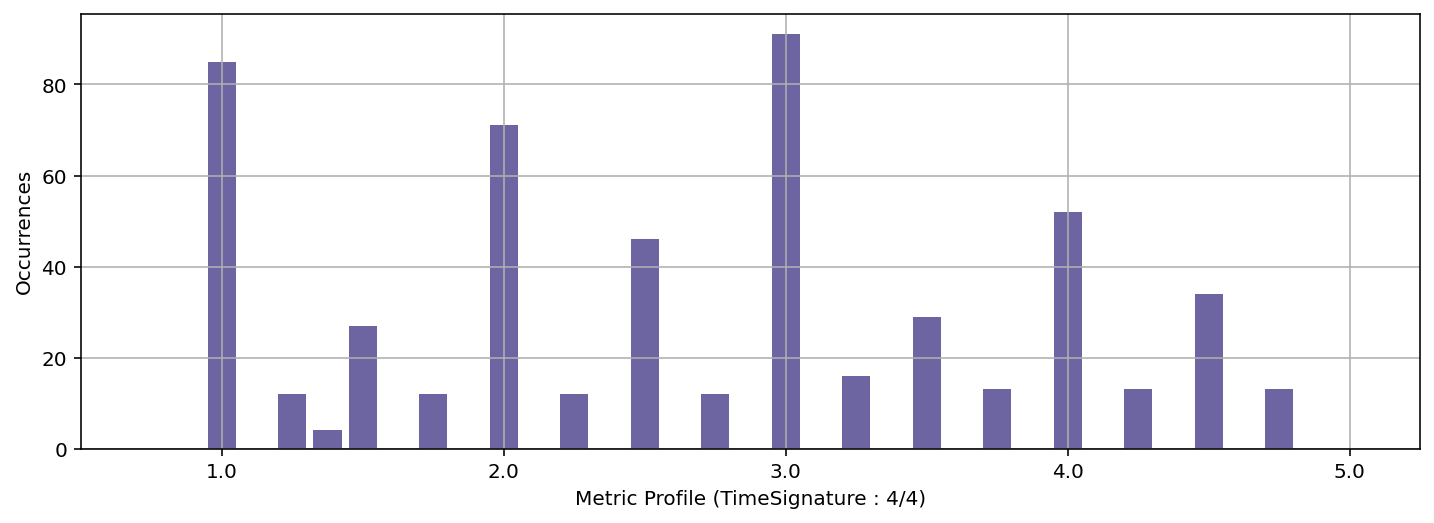

In [17]:
mp_ts_dict = mp.analyse.metric_profile_split_time_signature(m_df, with_pitch=False, do_plot=True)

In [18]:
for k in mp_ts_dict.keys():
    print(f"Time Signature {k}")
    saveas = 'metric_profile_'+k.replace('/','-')+'.csv'
    mp.utils.export_as_csv(data=mp_ts_dict[k], 
                           columns=['Interval', 'Occurrences'],
                           save_file_name =saveas, 
                           do_save=False,
                                   do_print=True, 
                                   do_return_pd=False,
                                   sep=';', 
                                   index=False, 
                                   header=True)


Time Signature 3/4


Interval,Occurrences
1,344
1,55
1,18
1,13
2,227
2,78
3,258
3,3
3,65
3,9


Time Signature 4/4


Interval,Occurrences
1,85
1,12
1,4
1,27
1,12
2,71
2,12
2,46
2,12
3,91


### 2.4 Intervalle im einstimmigen Verlauf

Wie häufig kommen bestimmte Intervallschritte in den einzelnen Stimmen vor? Sind da alle Stimmen ähnlich gelagert – oder gibt es z.B. in den Unterstimmen mehr Sprünge, in der Melodiestimme mehr Schritte?

Schauen wir uns zunächst die Intervallverteilung in der ersten Stimme an. 

[['1' 'Violino I']
 ['2' 'Violino II']
 ['3' 'Viola']
 ['4' 'Violoncello']]


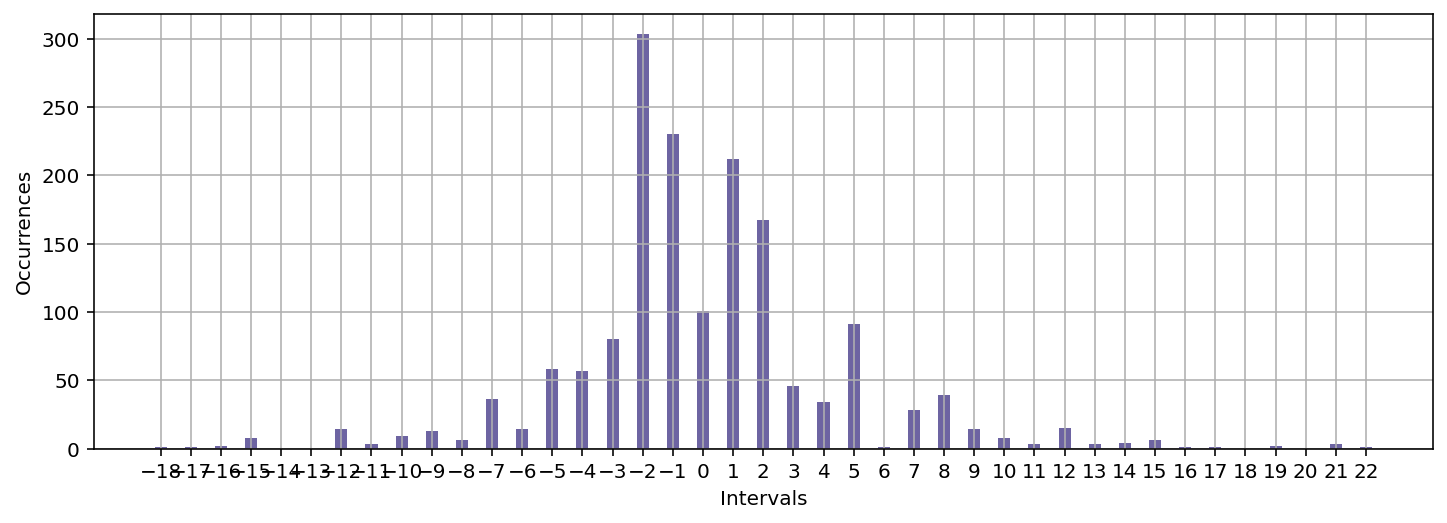

Interval,Occurrences
-18,1
-17,1
-16,2
-15,8
-12,14
-11,3
-10,9
-9,13
-8,6
-7,36


In [19]:
v = m_df[['PartID','PartName']].drop_duplicates().to_numpy()
print(v)

# Durch diesen Befehl werden zunächst die Stimmen und ihre Bezeichnung angezeigt. 

interval_hist = mp.analyse.interval(m_df,
                                    part='1',
                                    do_plot=True)

# Durch 'part='1'' wird die erste Stimme angezeigt. 
# Der folgende Befehl exportiert die Intervallhäufigkeiten
# in die Datei 'interval_1.csv' (nur falls 'do_save=True')

mp.utils.export_as_csv(data=interval_hist, 
                       columns=['Interval', 'Occurrences'],
                       save_file_name ='interval_1.csv', 
                       do_save=False,
                       do_print=True, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

### 3. Zweidimensionale Häufigkeitsverteilungen

Wir haben uns bereits die Häufigkeiten von Tonhöhen bzw. Tonhöhenklassen angeschaut. Nun könnte man sagen: Längere Töne haben natürlich mehr Gewicht als kurze Töne oder Töne zwischen den Zählzeiten. Diesen Gedanken können wir weiterverfolgen, indem wir uns kombinierte, ‚doppelte‘ oder ‚bivariate‘ Häufigkeitsverteilungen: Also z.B. die Häufigkeiten der Tonhöhen für jeweils die verschiedenen Dauernwerte oder die Häufigkeiten der Tonhöhenklasse jeweils für die verschiedenen metrischen Positionen. Hierum soll es im Folgenden anhand von zwei Beispielen gehen.  

Beispiel 1: Dauern pro Tonhöhenklassen.
Gibt es Unterschiede bei den Dauernwerten bzgl. der verschiedenen Tonhöhenklassen?

Beispiel 2: Tonhöhen auf metrischen Positionen
Gibt es Unterschiede bei den Dauernwerten bzgl. der verschiedenen Tonhöhenklassen?

@ Christon: How can we choose pitch classes instead of pitches (in section 3.1 and 3.2). Pitch classes are much more easily understandable...

### 3.1 Dauernwerte pro Tonhöhen

<font color='red'>quarterlength_duration_histogram 2D</font> 
<br>


plot_with(str): accepts three paramters: 'PitchClass', 'Pitch' and None
<br>

None will plot -> 2d plot
<br>

Pitch and PitchClass -> 3d plot

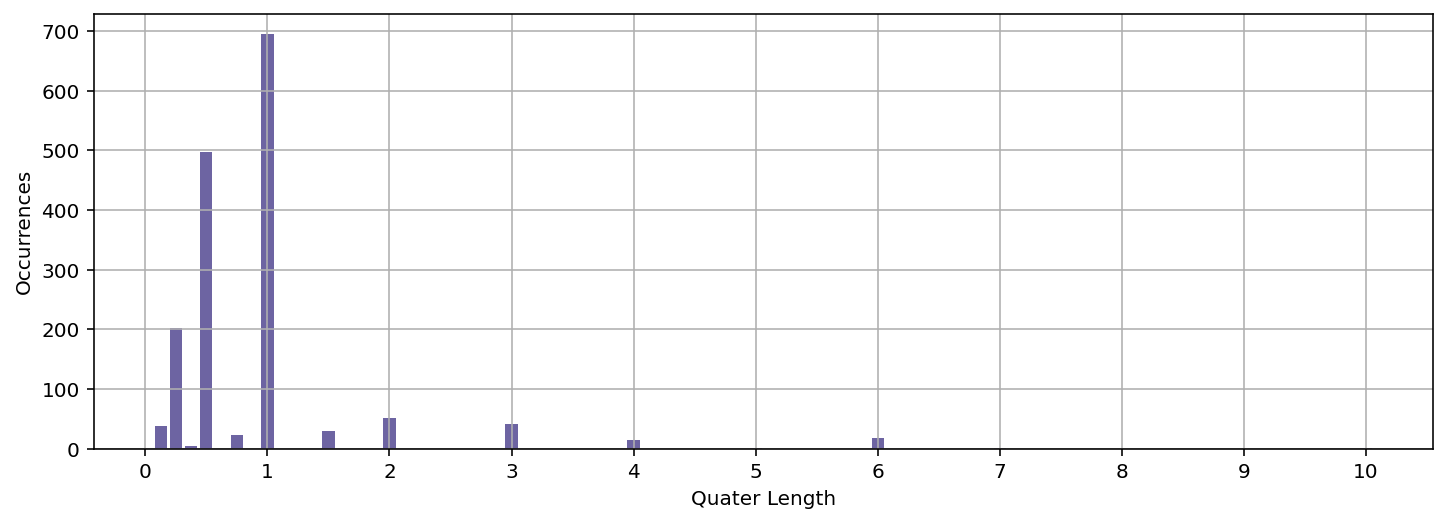

Quater Length,Occurrences
0.12,38
0.25,202
0.38,4
0.50,497
0.75,22
1.00,694
1.50,30
2.00,51
3.00,42
4.00,15


In [20]:
dur_hist = mp.analyse.quarterlength_duration_histogram(m_df,
                                                       plot_with=None,
                                                       do_plot=True)
mp.utils.export_as_csv(data=dur_hist,
                           columns=['Quater Length', 'Occurrences'],
                           save_file_name='QuaterLength.csv',
                           do_save=False,
                           do_print=True,
                           do_return_pd=False,
                           sep=';',
                           index=False,
                           header=True)

# plot_with(str): accepts three paramters: 'PitchClass', 'Pitch' and None
## None will plot -> 2d plot
## Pitch and PitchClass -> 3d plot


# Durch den Zusatz 'with_pitch=True' wird eine 3D-Grafik der 
# Tonhöhen pro Dauernklasse aktiviert. 

Da die CD-Grafik im Browser sehr klein ist, empfiehlt es sich auch hier, sie in einem externen Fenster zu öffnen. Dies geschieht, indem der Befehl '%matplotlib' vorangestellt wird: 

<font color='red'>quarterlength_duration_histogram 3D with 'PitchClass'</font> 

Using matplotlib backend: MacOSX


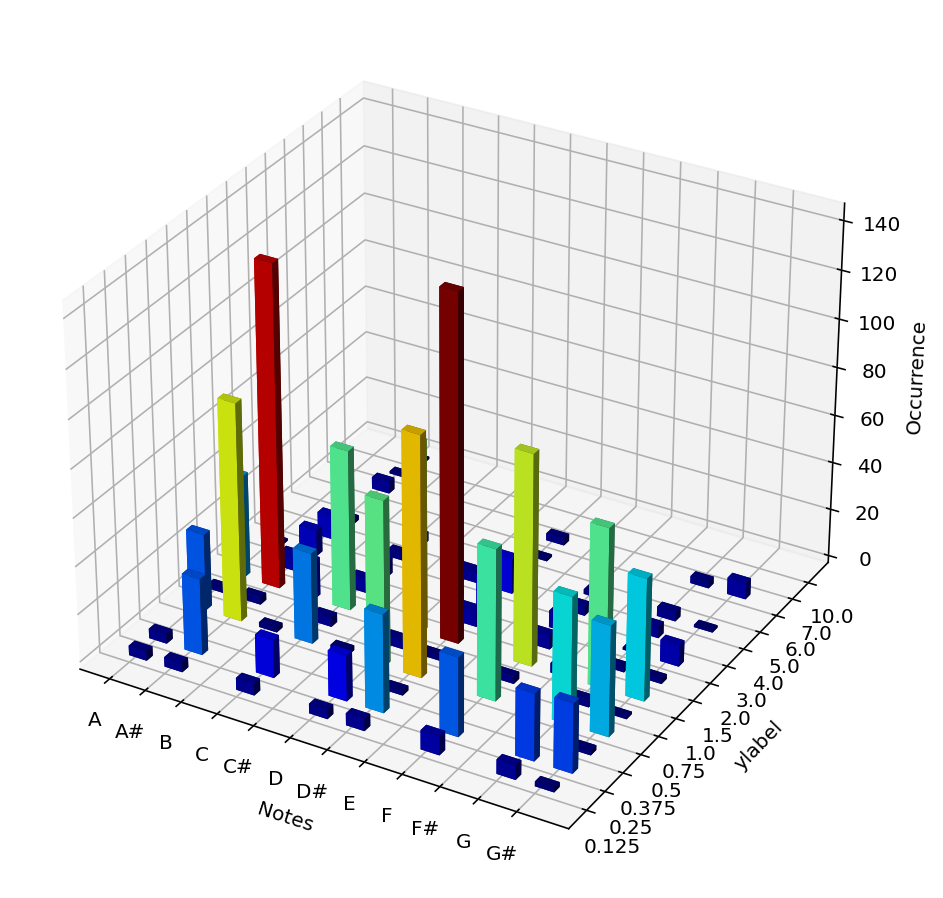

In [21]:
%matplotlib

dur_pc_hist = mp.analyse.quarterlength_duration_histogram(m_df,
                                                          plot_with='PitchClass',
                                                          do_plot=True)

<font color='red'>quarterlength_duration_histogram 3D with 'Pitch'</font> 

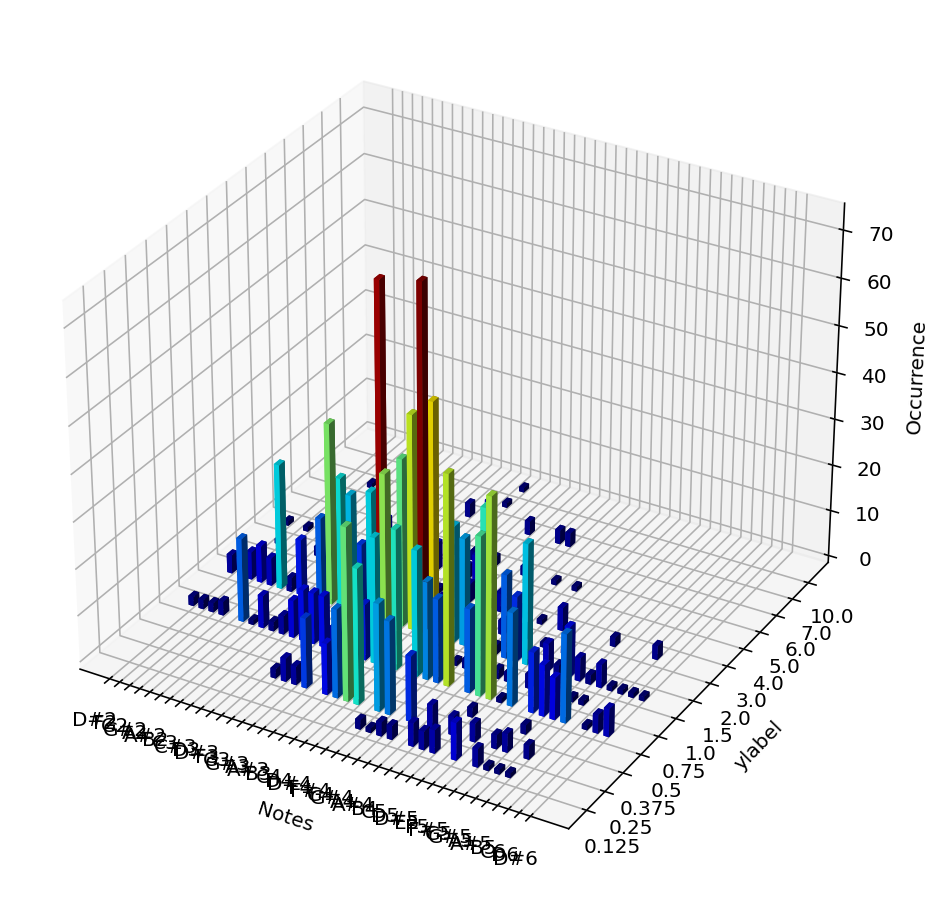

In [22]:
#%matplotlib

dur_pc_hist = mp.analyse.quarterlength_duration_histogram(m_df,
                                                          plot_with='Pitch',
                                                          do_plot=True)

Nun öffnet sich die Grafik im Matplotlib-Pop-Up-Fenster und kann dort weiter bearbeitet, gedreht und vergrößert werden. Um diese Funktion bei folgenden Grafiken wieder auszuschalten, muss der Befehl '%matplotlib inline' ausgeführt werden: 

In [23]:
%matplotlib inline

### 3.2 Tonhöhen pro metrischer Position

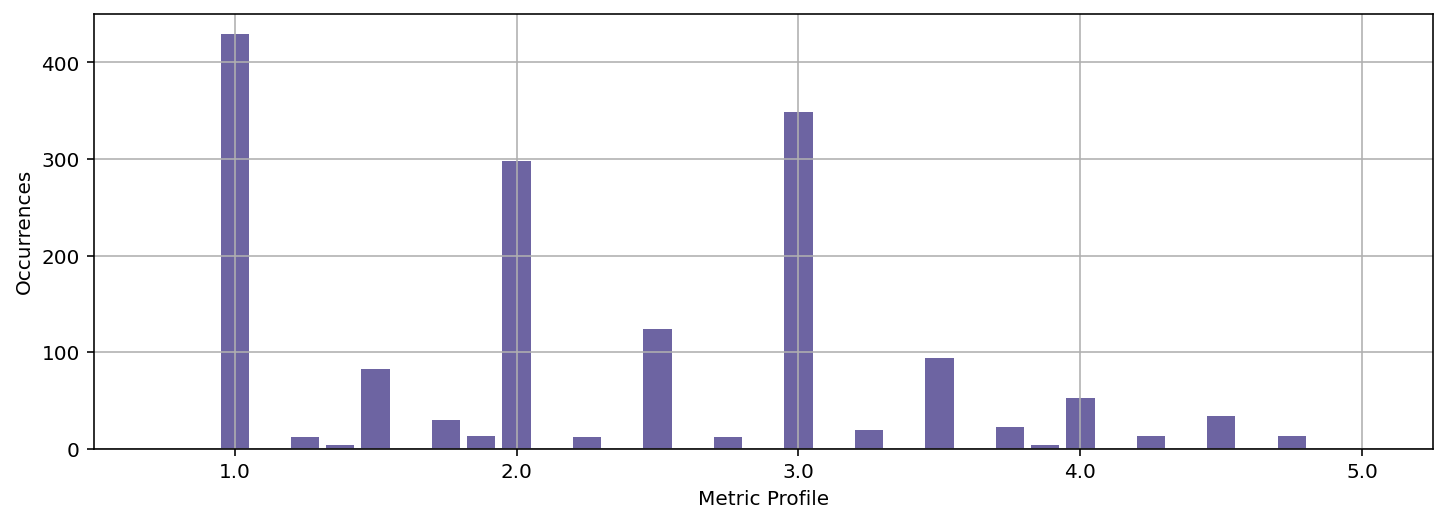

ValueError: 4 columns passed, passed data had 2 columns

In [24]:
metric_profile_p_hist = mp.analyse.metric_profile(m_df, with_pitch=True, do_plot=True)

mp.utils.export_as_csv(data=metric_profile_p_hist, 
                       columns=['MIDI', 'Pitch','Metric Profile','Occurrences'],
                       save_file_name ='metric_profile_hist.csv', 
                       do_save=False,
                       do_print=True, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

Auch hier ist es sinnvoll, sich die Grafik im externen Pop-Up-Fenster von Matplotlib anzuschauen. 

In [ ]:
%matplotlib

# Wichtig: Matplotlib muss anschließend durch die #-Taste sowie zusätzlich
# durch den Befehl '&matplotlib inline' wieder ausgeschaltet werden, 
# sonst werden alle folgenden Grafiken im externen Fenstergeöffnet!

metric_profile_p_hist = mp.analyse.metric_profile(m_df, with_pitch=True, do_plot=True)

mp.utils.export_as_csv(data=metric_profile_p_hist, 
                       columns=['MIDI', 'Pitch','Metric Profile','Occurrences'],
                       save_file_name ='metric_profile_hist.csv', 
                       do_save=False,
                       do_print=True, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

In [ ]:
mp_ts_dict_02 = mp.analyse.metric_profile_split_time_signature(m_df, with_pitch=True, do_plot=True)


In [ ]:


for k2 in mp_ts_dict_02.keys():
    print(f"Time Signature {k2}")
    saveas = 'metric_profile_02_'+k2.replace('/','-')+'.csv'

    mp.utils.export_as_csv(data=mp_ts_dict_02[k2], 
                       columns=['MIDI', 'Pitch','Metric Profile','Occurrences'],
                       save_file_name ='metric_profile_hist.csv', 
                       do_save=False,
                       do_print=True, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

### 4. Anwendung von Takt- und Stimmenfilter

Alle statistischen Abfragen lassen sich durch eine einfach zu bedienende Filterfunktion auf beliebige Ausschnitte und Stimmen eingrenzen. Dazu muss man nur die entsprechenden Taktangaben und Stimmenbezeichnungen eingeben. 

Hier zwei Beispiele: 

Mit den folgenden Befehlen lässt sich die Liste der Intervallhäufigkeiten anzeigen exportieren bzw. als Histogramm anzeigen.

In [ ]:
# Ausgewählt werden die erste und zweite Stimme ('PartID':'1-2')
# und die Takte 1-5 ('Measure':'1-5')
# Diese Auswahl lässt sich beliebig verändern! 

filter_dict_interval ={'PartID':'1-2', 'Measure':'1-5'}
interval_hist_example = mp.analyse.interval(m_df,
                                    part='all',
                                    do_plot=True, filter_dict = filter_dict_interval)

mp.utils.export_as_csv(data=interval_hist_example, 
                       columns=['Interval', 'Occurrences'],
                       save_file_name ='interval.csv', 
                       do_save=False,
                       do_print=True, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

### 5. Aufgaben

Vergleichende statistische Abfragen über mehrere Stücke:

Wir haben uns die Ergebnisse bislang nur anhand jeweils eines Stückes angeschaut. Wie stellt sich nun aber die Lage dar, wenn wir mehrere Stücke, z.B. mehrere oder alle Sätze der Komposition, miteinander – und mit anderen Stücken – vergleichen? Gibt es da tatsächlich stilistische Regelmäßigkeiten – oder überwiegen die Unterschiede?

Wählen Sie Kompositionen Ihrer Wahl (verschiedene Gattungen, Komponisten und Epochen) und vergleichen Sie diese Stücke hinsichtlich der Häufigkeiten von Tonhöhen, Tonhöhenklassen, Notenwerten und Intervallen. Beschreiben Sie die Ergebnisse!